In [3]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import os

save_dir = "./figures/n360/"
os.makedirs(save_dir, exist_ok=True)

temperature_files = {
    1.5: "kalj_T1.5_n360_v300_10000_1",
    1.0: "kalj_T1_n360_v300_50000_1",
    0.9: "kalj_T0.9_n360_v300_150000_1",
    0.8: "kalj_T0.8_n360_v300_150000_1",
    0.7: "kalj_T0.7_n360_v300_180000_1",
    0.65: "kalj_T0.65_n360_v300_350000_1",
    0.6: "kalj_T0.6_n360_v300_1000000_1",
    0.55: "kalj_T0.55_n360_v300_3000000_1",
    0.5: "kalj_T0.5_n360_v300_10000000_1",
    # 0.475: "kalj_T0.475_n360_v300_300000000_1"
}

# Initialize a single plot for RDFs across all temperatures
plt.figure(figsize=(10, 6))

for T, filename in temperature_files.items():
    u = mda.Universe(f"./Data/equil/{filename}.lammpstrj", 
                     f"./Data/prod/{filename}.unwrap.dcd", 
                     topology_format="LAMMPSDUMP")
    
    type1 = u.select_atoms("type 1")
    type2 = u.select_atoms("type 2")
    
    rdf_11 = InterRDF(type1, type1)
    rdf_22 = InterRDF(type2, type2)
    rdf_12 = InterRDF(type1, type2)
    
    rdf_11.run()
    rdf_22.run()
    rdf_12.run()
    
    # Plot RDF for each temperature on the same figure
    plt.plot(rdf_11.results.bins, rdf_11.results.rdf, label=f"g_11(r) at T={T}")
    plt.plot(rdf_22.results.bins, rdf_22.results.rdf, label=f"g_22(r) at T={T}")
    plt.plot(rdf_12.results.bins, rdf_12.results.rdf, label=f"g_12(r) at T={T}")

# Finalize and save the combined RDF plot
plt.xlabel("r (distance)")
plt.ylabel("g(r)")
plt.legend()
plt.title("Radial Distribution Function (RDF) Across Temperatures")
plt.savefig(f"{save_dir}/RDF_all_temperatures.png")
plt.close()

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os

save_dir = "./figures/n360/"
os.makedirs(save_dir, exist_ok=True)

temperature_files = {
    1.5: "kalj_T1.5_n360_v300_10000_1",
    1.0: "kalj_T1_n360_v300_50000_1",
    0.9: "kalj_T0.9_n360_v300_150000_1",
    0.8: "kalj_T0.8_n360_v300_150000_1",
    0.7: "kalj_T0.7_n360_v300_180000_1",
    0.65: "kalj_T0.65_n360_v300_350000_1",
    0.6: "kalj_T0.6_n360_v300_1000000_1",
    0.55: "kalj_T0.55_n360_v300_3000000_1",
    0.5: "kalj_T0.5_n360_v300_10000000_1",
    # 0.475: "kalj_T0.475_n360_v300_300000000_1"
}

# Initialize a single plot for MSDs across all temperatures
plt.figure(figsize=(10, 6))

for T, filename in temperature_files.items():
    u = mda.Universe(f"./Data/equil/{filename}.lammpstrj", 
                     f"./Data/prod/{filename}.unwrap.dcd", 
                     topology_format="LAMMPSDUMP")
    
    type1 = u.select_atoms("type 1")
    
    n_frames = len(u.trajectory)
    msd = np.zeros(n_frames)
    time = np.arange(n_frames) * u.trajectory.dt  # Time data
    
    # Calculate MSD for each frame
    initial_positions = type1.positions.copy()  # Initial positions for displacement calculation
    for ts in u.trajectory:
        displacements = type1.positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[ts.frame] = np.mean(squared_displacements)
    
    # Plot MSD for each temperature on the same figure
    plt.loglog(time, msd, label=f"T={T}")

# Finalize and save the combined MSD plot
plt.xlabel("Time")
plt.ylabel("MSD")
plt.title("Mean-Squared Displacement (MSD) Across Temperatures")
plt.legend()
plt.savefig(f"{save_dir}/MSD_all_temperatures.png")
plt.close()

MSD did not reach 1 at temperature 1.5


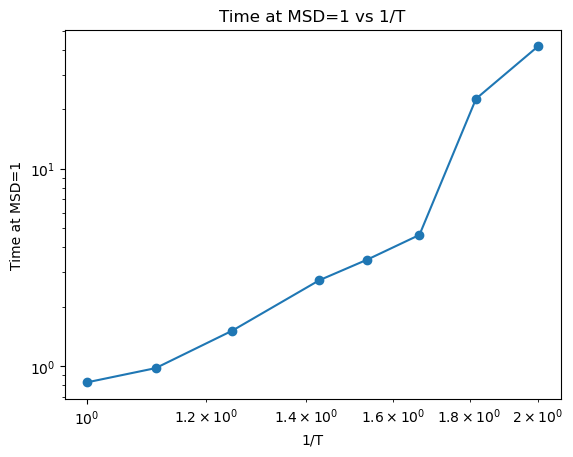

In [9]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os

save_dir = "./figures/n360/"
os.makedirs(save_dir, exist_ok=True)

temperature_files = {
    1.5: "kalj_T1.5_n360_v300_10000_1",
    1.0: "kalj_T1_n360_v300_50000_1",
    0.9: "kalj_T0.9_n360_v300_150000_1",
    0.8: "kalj_T0.8_n360_v300_150000_1",
    0.7: "kalj_T0.7_n360_v300_180000_1",
    0.65: "kalj_T0.65_n360_v300_350000_1",
    0.6: "kalj_T0.6_n360_v300_1000000_1",
    0.55: "kalj_T0.55_n360_v300_3000000_1",
    0.5: "kalj_T0.5_n360_v300_10000000_1",
}

target_msd = 1  
msd1_times = []  
valid_temperatures = []  

for T, filename in temperature_files.items():
    u = mda.Universe(f"./Data/equil/{filename}.lammpstrj", 
                     f"./Data/prod/{filename}.unwrap.dcd", 
                     topology_format="LAMMPSDUMP")
    
    type1 = u.select_atoms("type 1")
    
    n_frames = len(u.trajectory)
    msd = np.zeros(n_frames)
    time = np.arange(n_frames) * u.trajectory.dt
    
    # Save the initial positions to use as a reference for displacement
    initial_positions = type1.positions.copy()
    
    for ts in u.trajectory:
        displacements = type1.positions - initial_positions
        squared_displacements = np.sum(displacements ** 2, axis=1)
        msd[ts.frame] = np.mean(squared_displacements)
    
    # Check if MSD reaches the target value and capture the time
    try:
        time_msd1 = time[np.where(msd >= target_msd)[0][0]]
        msd1_times.append(time_msd1)
        valid_temperatures.append(T)
    except IndexError:
        print(f"MSD did not reach 1 at temperature {T}")
        continue

# Plot Time at MSD=1 vs 1/T
inv_temperatures = 1 / np.array(valid_temperatures)
plt.figure()
plt.loglog(inv_temperatures, msd1_times, marker='o')
plt.xlabel("1/T")
plt.ylabel("Time at MSD=1")
plt.title("Time at MSD=1 vs 1/T")
plt.savefig(f"{save_dir}/Time_at_MSD_1_vs_1_over_T.png")
plt.show()